In [1]:
import os, json

from matplotlib import pyplot as plt
import seaborn as sns

In [30]:
path = "data_robustness/"

data = []
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]

for index, js in enumerate(json_files):
        with open(os.path.join(path, js)) as json_file:
            data.append(json.load(json_file))

In [31]:
count = 0
for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2:
        for ind,val in enumerate(item['visibilities']):
            if val>1:
                item['visibilities'][ind]=1
                count+=1
count

8886

In [32]:
vis_mean = {}
vis_probout = {}

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2:
        vis_mean[str(item['num of observables'])] = sum(item['visibilities'])/len(item["visibilities"])
        vis_probout[str(item['num of observables'])] = len([v for v in item['visibilities'] if v < 0.999999])/len(item['visibilities'])
        print(item['num of observables'], vis_mean[str(item['num of observables'])], vis_probout[str(item['num of observables'])] )
        

4 0.9677760922199664 0.80692
6 0.9174847851668819 0.995
8 0.8803122990206291 1.0
3 0.9899762147872819 0.3878
7 0.8971620480293445 1.0
5 0.9414326010547086 0.96842


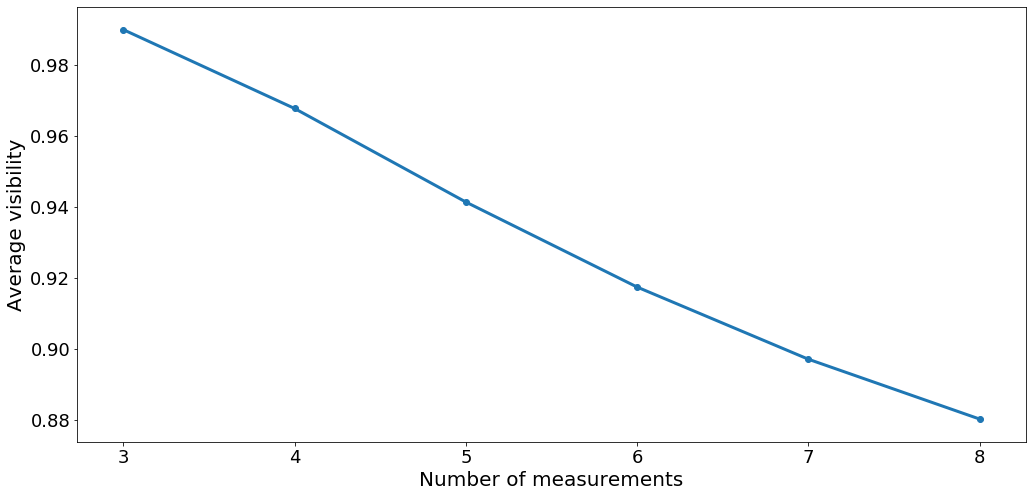

In [33]:
vis_avg = [x for _,x in sorted(zip(list(vis_mean.keys()),list(vis_mean.values())))]
# vis_probout = [x for _,x in sorted(zip(list(vis_probout.keys()),list(vis_probout.values())))]

fig = plt.figure(figsize=(17, 8))

plt.plot(range(3,len(vis_avg)+3), vis_avg, linewidth = 3, zorder=1)
plt.scatter(range(3,len(vis_avg)+3), vis_avg, zorder=2)

# plt.plot(range(3,len(vis_probout)+3), vis_probout, linewidth = 3, zorder=1)
# plt.scatter(range(3,len(vis_probout)+3), vis_probout, zorder=2)

plt.xlabel('Number of measurements', fontsize=20)
plt.ylabel('Average visibility', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
plt.show()

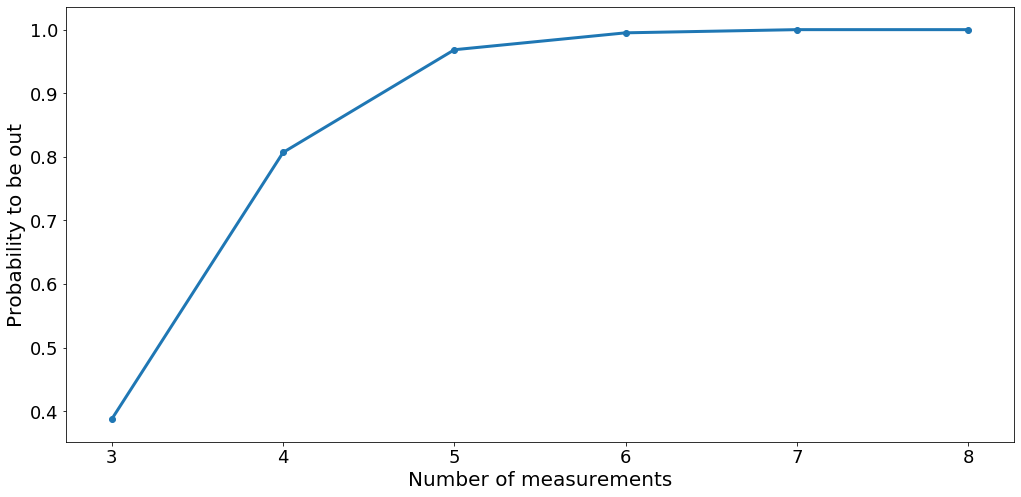

In [34]:
# vis_avg = [x for _,x in sorted(zip(list(vis_mean.keys()),list(vis_mean.values())))]
vis_probout = [x for _,x in sorted(zip(list(vis_probout.keys()),list(vis_probout.values())))]

fig = plt.figure(figsize=(17, 8))

# plt.plot(range(3,len(vis_avg)+3), vis_avg, linewidth = 3, zorder=1)
# plt.scatter(range(3,len(vis_avg)+3), vis_avg, zorder=2)

plt.plot(range(3,len(vis_probout)+3), vis_probout, linewidth = 3, zorder=1)
plt.scatter(range(3,len(vis_probout)+3), vis_probout, zorder=2)

plt.xlabel('Number of measurements', fontsize=20)
plt.ylabel('Probability to be out', fontsize=20)
plt.tick_params(axis='both', labelsize=18)
plt.show()

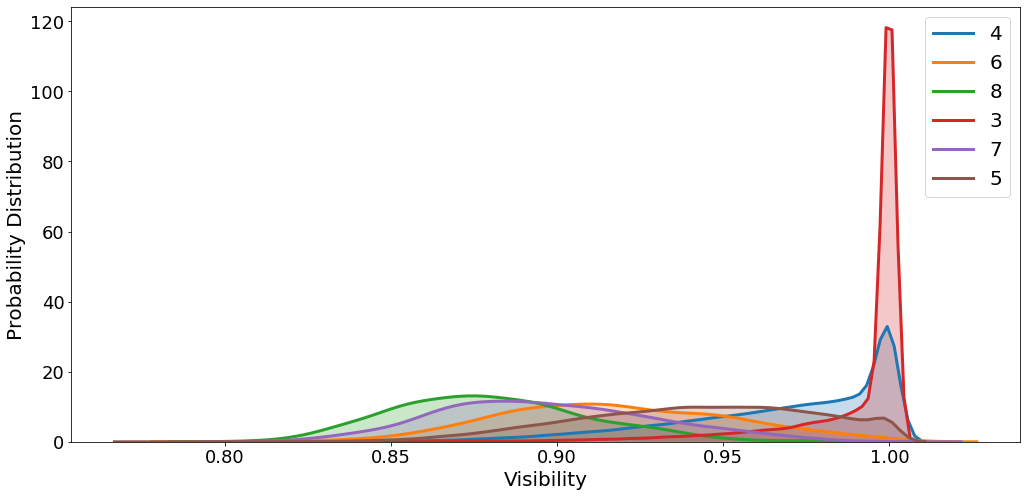

In [36]:
plt.figure(figsize=(17,8))

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2:
        ax = sns.distplot(item['visibilities'], hist = False, kde = True,
                         kde_kws = {'shade': True, 'linewidth': 3},
                          label = item['num of observables'])
        #print(len(item["visibilities"]))

# ax.set(xlabel='Visibility', ylabel='Probability Distribution')

ax.set_xlabel('Visibility', fontsize = 20)
ax.set_ylabel('Probability Distribution', fontsize = 20)

ax.legend(fontsize = 20)

plt.tick_params(axis='both', labelsize=18)